In [1]:
pip install uproot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.5/363.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.4/871.4 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.0 MB/s eta 0:00:00


In [2]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc



"""
Designing boosted decision tree for the classification of tau hadronic decay and hard QCD jets

variable to use :  theta_J and N_T initially to segment phase space and then use lambda_J, r_2 and tau_31 to analyze the subspaces using multi-variate analysis
files given  : signal (tauhadronic_out.root) and background (hardqcd_200k_minpt50_out.root)
"""
# variables = ["thetaJ", "trackno", "LambdaJ", "ecfr2", "tau31"] #
#Not used it, used all variables



def create_df(file_name, label):
    file = uproot.open(f"/content/{file_name}.root")  # Corrected path
    tree_name = list(file.keys())[0]
    tree = file[tree_name]
    df = tree.arrays(library="pd")
    df["label"] = label
    return df

#create a parquet file from the root file
def write_parquet(file_name):
    file  = uproot.open(f"/content/{file_name}.root")  # Corrected path
    print(file.keys())
    tree_name = list(file.keys())[0]
    tree = file[tree_name]
    df = tree.arrays(library="pd")
    df.to_parquet(f"/content/converted_{file_name}.parquet", index=False)  # Save in /content/
    print(f"saved {file_name}.parquet")
    return


if __name__ == "__main__":

    signal_file = "tauhadronic1L_minpt50_out"
    background_file = "hardqcd_200k_minpt50_out2"

    # write_parquet(signal_file)
    # write_parquet(background_file)

    signal_df = create_df(signal_file, 1)
    background_df = create_df(background_file, 0)

    print(len(signal_df), len(background_df))

    # write_parquet(signal_file)
    write_parquet(background_file)

    df = pd.concat([signal_df, background_df], axis=0)
    df = df.sample(frac=1).reset_index(drop=True)

    X = df.drop(columns=["label"])
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")









27956 97708
['TreeB;1']
saved hardqcd_200k_minpt50_out2.parquet
Training samples: 100531, Testing samples: 25133


In [3]:
df.head()

,tau1,tau21,tau31,tau32,rho,LambdaJ,trackno,thetaJ,Area,epsJ,...,ecfr0,ecfr1,ecfr2,ecfr3,ecfr4,ecfdr1,ecfdr2,ecfdr3,ecfdr4,label
0,-0.319028,0.581499,0.404704,0.695967,0.745656,-0.190212,5.0,-0.140083,0.0,0.170093,...,58.440361,7.446845,1.262392,0.239581,0.046653,0.127426,0.169520,0.189784,0.194727,0
1,-0.508715,0.704840,0.538436,0.763912,0.439914,-0.236882,3.0,-0.398119,0.0,0.219092,...,58.800652,5.234149,0.753678,0.126106,0.020428,0.089015,0.143992,0.167321,0.161991,0
2,-0.992025,0.678866,0.464999,0.684964,0.191274,-0.316235,3.0,-0.189125,0.0,0.209440,...,114.344444,3.554437,0.335525,0.044678,0.005198,0.031085,0.094396,0.133158,0.116335,0
3,-0.752965,0.296259,0.195138,0.658675,0.348722,-0.243771,2.0,-0.054087,0.0,0.241600,...,74.993195,3.529580,0.303814,0.036503,0.003273,0.047065,0.086077,0.120150,0.089670,0
4,-0.382718,0.588661,0.372114,0.632136,0.865868,-0.206111,3.0,-0.038490,0.0,0.207029,...,57.132320,7.031165,1.276573,0.235076,0.036129,0.123068,0.181559,0.184146,0.153691,0


In [4]:
df.columns

Index(['tau1', 'tau21', 'tau31', 'tau32', 'rho', 'LambdaJ', 'trackno',
       'thetaJ', 'Area', 'epsJ', 'pTbyM', 'ecf0', 'ecf1', 'ecf2', 'ecf3',
       'ecf4', 'ecf5', 'normalized_ecf1', 'normalized_ecf2', 'normalized_ecf3',
       'ecfr0', 'ecfr1', 'ecfr2', 'ecfr3', 'ecfr4', 'ecfdr1', 'ecfdr2',
       'ecfdr3', 'ecfdr4', 'label'],
      dtype='object')

In [5]:
signal_df.columns

Index(['tau1', 'tau21', 'tau31', 'tau32', 'rho', 'LambdaJ', 'trackno',
       'thetaJ', 'Area', 'epsJ', 'pTbyM', 'ecf0', 'ecf1', 'ecf2', 'ecf3',
       'ecf4', 'ecf5', 'normalized_ecf1', 'normalized_ecf2', 'normalized_ecf3',
       'ecfr0', 'ecfr1', 'ecfr2', 'ecfr3', 'ecfr4', 'ecfdr1', 'ecfdr2',
       'ecfdr3', 'ecfdr4', 'label'],
      dtype='object')

In [6]:
background_df.columns

Index(['tau1', 'tau21', 'tau31', 'tau32', 'rho', 'LambdaJ', 'trackno',
       'thetaJ', 'Area', 'epsJ', 'pTbyM', 'ecf0', 'ecf1', 'ecf2', 'ecf3',
       'ecf4', 'ecf5', 'ecfr0', 'ecfr1', 'ecfr2', 'ecfr3', 'ecfr4', 'ecfdr1',
       'ecfdr2', 'ecfdr3', 'ecfdr4', 'label'],
      dtype='object')

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb



# Features and labels
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Grid Search Hyperparameters
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model and predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19508
           1       1.00      1.00      1.00      5625

    accuracy                           1.00     25133
   macro avg       1.00      1.00      1.00     25133
weighted avg       1.00      1.00      1.00     25133



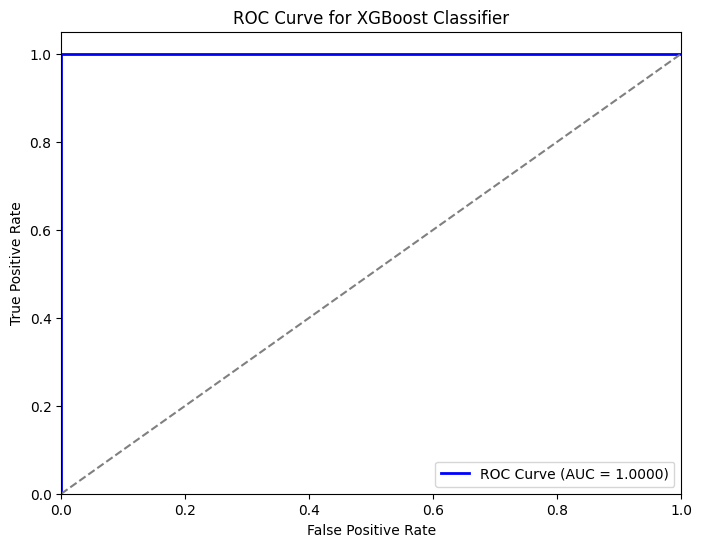

In [8]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Classifier")
plt.legend(loc="lower right")
plt.show()

In [13]:
sample_idx = np.random.randint(0, len(X_test), 5)
sample_X = X_test.iloc[sample_idx]
sample_y = y_test.iloc[sample_idx]

print("Actual Labels:", sample_y.values)
print("Predicted Labels:", best_model.predict(sample_X))
print("Predicted Probabilities:", best_model.predict_proba(sample_X)[:, 1])


Actual Labels: [1 0 0 1 0]
Predicted Labels: [1 0 0 1 0]
Predicted Probabilities: [0.54541177 0.1500887  0.1500887  0.54541177 0.1500887 ]
